***
# <font color=orange size=10>Cap√≠tulo 2 - Distribuciones de datos y muestreo</font>
***


## <font color=green size=10>2.1 Poblaci√≥n y muestra</font>
***

La siguiente imagen intenta ilustrar la diferencia entre poblaci√≥n y muestra:

![Fig 2.1](Datos/Poblacion_Muestra.png)

## <font color=green size=10>2.2 Muestreo Aleatorio y Sesgo (Bias) en la Muestra</font>
***

Una muestra es un subconjunto de datos dentro  un conjunto de datos m√°s grande la poblaci√≥n.

El muestreo aleatorio es un proceso en el cual cada miembro disponible de la poblaci√≥n que se est√° muestreando tiene la misma posibilidad de ser elegido para la muestra en cada selecci√≥n. La muestra resultante se llama una **muestra aleatoria simple**. 

La calidad de los datos a menudo importa m√°s que la cantidad de datos al hacer una estimaci√≥n o un modelo basado en una muestra. La calidad de los datos en ciencia de datos implica completitud, consistencia de formato, limpieza y precisi√≥n de los puntos de datos individuales. La estad√≠stica adem√°s a√±ade la noci√≥n de **representatividad**.

### <font color=violet size=10>2.2.1 T√©rminos Clave para el Muestreo Aleatorio</font>
***

**Muestra (Sample)**  
Un subconjunto de un conjunto de datos m√°s grande.

**Poblaci√≥n**  
El conjunto de datos m√°s grande o la idea de un conjunto de datos.

**N (n)**  
El tama√±o de la poblaci√≥n (muestra).

**Muestreo aleatorio**  
Selecci√≥n de elementos en una muestra de manera aleatoria.

**Muestreo estratificado**  
Divisi√≥n de la poblaci√≥n en estratos y muestreo aleatorio dentro de cada estrato. Por ejemplo: estudiantes de un colegio. Se escogen muestras de cada grado/a√±o. 20 Estudiantes de 1er a√±o, 20 estudiantes del 2do a√±o...

**Estrato (pl., estratos)**  
Un subgrupo homog√©neo de una poblaci√≥n con caracter√≠sticas comunes. Ejemplo: Estudiantes del primer a√±o.

**Muestra aleatoria simple**  
La muestra que resulta del muestreo aleatorio sin estratificar la poblaci√≥n.

**Sesgo (Bias)**  
Error sistem√°tico.

**Sesgo en la muestra (Sample Bias)**  
Una muestra que no representa adecuadamente a la poblaci√≥n.

### <font color=violet size=10>2.2.2 Sesgo de Muestreo por Autoselecci√≥n</font>
***

Las rese√±as de restaurantes, hoteles, caf√©s, y otros que lees en sitios de redes sociales son propensas al sesgo porque las personas que las env√≠an no son seleccionadas aleatoriamente; m√°s bien, son ellas mismas quienes toman la iniciativa de escribir. Esto conduce a un sesgo de autoselecci√≥n: las personas motivadas para escribir rese√±as pueden haber tenido malas experiencias, pueden tener alguna relaci√≥n con el establecimiento, o simplemente pueden ser un tipo de persona diferente a las que no escriben rese√±as.

### 2.2.3 Sesgo

El sesgo estad√≠stico se refiere a errores de medici√≥n o de muestreo que son sistem√°ticos y producidos por el proceso de medici√≥n o muestreo. Es importante hacer una distinci√≥n entre errores debidos al azar y errores debidos al sesgo. Consideremos el proceso f√≠sico de un arma disparando a un blanco. No impactar√° en el centro absoluto del blanco cada vez, o incluso la mayor√≠a de las veces. Un proceso no sesgado producir√° error, pero este ser√° aleatorio y no tender√° fuertemente en ninguna direcci√≥n (ver Figura 2.2). 

![fig 2.2](Datos/2.2.png)

Los resultados mostrados en la Figura 2.3 muestran un proceso sesgado: sigue habiendo error aleatorio en ambas direcciones, x e y, pero tambi√©n hay un sesgo. Los disparos tienden a caer en el cuadrante superior derecho.

![Fig 2.3](Datos/2.3.png)

El sesgo se presenta en diferentes formas y puede ser observable o invisible. Cuando un resultado sugiere la presencia de sesgo (por ejemplo, al compararlo con un punto de referencia o valores reales), a menudo es un indicador de que un modelo estad√≠stico o de aprendizaje autom√°tico ha sido mal especificado, o que se ha omitido una variable importante.


> **Ejercicio 2.1**: *Investigar los tipos de sesgos (Bias) en estad√≠stica y aprendizaje autom√°tico.* A√±ade un resumen en este mismo notebook.

Existen varios tipos de sesgos pero se explican los sesgos comunes como: el sesgo de selecci√≥n, sesgo de informaci√≥n y sesgo de confirmaci√≥n, entre otros, y veremos c√≥mo pueden afectar los modelos de aprendizaje autom√°tico.

1. Sesgo de Selecci√≥n (Selection Bias)

El sesgo de selecci√≥n ocurre cuando los datos utilizados para entrenar un modelo de aprendizaje autom√°tico no son representativos de la poblaci√≥n general que el modelo intenta predecir. Esto puede deberse a una muestra no aleatoria o a la exclusi√≥n de ciertos grupos durante la recopilaci√≥n de datos.

Ejemplo:
Supongamos que estamos creando un modelo para predecir enfermedades card√≠acas, pero solo recolectamos datos de hospitales urbanos, ignorando las √°reas rurales.

In [1]:
import pandas as pd
import numpy as np

# Generamos datos simulados
np.random.seed(42)
data_urbana = np.random.normal(loc=60, scale=10, size=100)  # M√°s casos en zonas urbanas
data_rural = np.random.normal(loc=50, scale=10, size=40)    # Menos casos en zonas rurales

# Unimos los datos
data = np.concatenate([data_urbana, data_rural])
labels = ['urbano'] * 100 + ['rural'] * 40

# Creamos el DataFrame
df = pd.DataFrame({'Edad': data, 'Zona': labels})
display(df)

# Visualizamos el problema del sesgo de selecci√≥n
display(df.groupby('Zona').mean())


Edad    Zona
0    64.967142  urbano
1    58.617357  urbano
2    66.476885  urbano
3    75.230299  urbano
4    57.658466  urbano
..         ...     ...
135  65.499344   rural
136  42.167467   rural
137  46.779385   rural
138  58.135172   rural
139  37.691357   rural

[140 rows x 2 columns]

Edad
Zona             
rural   49.655161
urbano  58.961535

2. Sesgo de Informaci√≥n (Information Bias)

Este tipo de sesgo ocurre cuando hay errores en la medici√≥n de las variables o en la informaci√≥n recopilada, lo que lleva a conclusiones err√≥neas.

Ejemplo:
Imagina que un sensor que mide la temperatura est√° defectuoso y siempre registra temperaturas 5 grados m√°s altas.

In [2]:
# Simulaci√≥n de lecturas de temperatura
temperaturas_reales = np.random.normal(loc=20, scale=5, size=100)
temperaturas_medidas = temperaturas_reales + 5  # Sensor defectuoso

# Comparaci√≥n de temperaturas
df_temp = pd.DataFrame({'Real': temperaturas_reales, 'Medida': temperaturas_medidas})
print(df_temp.head())


        Real     Medida
0  21.137300  26.137300
1  26.535714  31.535714
2  11.962584  16.962584
3  20.923169  25.923169
4  21.299414  26.299414


3. Sesgo de Confirmaci√≥n (Confirmation Bias)

El sesgo de confirmaci√≥n es la tendencia a favorecer, buscar, interpretar y recordar informaci√≥n de una manera que confirma las creencias o hip√≥tesis preexistentes, mientras se da menos consideraci√≥n a posibles alternativas.

Ejemplo:
Supongamos que solo recolectamos datos adicionales cuando estos apoyan nuestra hip√≥tesis inicial.

In [3]:
# Generamos datos iniciales
datos = np.random.normal(loc=0, scale=1, size=50)

# Suponemos que nuestra hip√≥tesis es que la media es positiva
media_observada = np.mean(datos)
print("Media observada:", media_observada)

# Recolectamos m√°s datos solo si la media observada es positiva
if media_observada > 0:
    datos_adicionales = np.random.normal(loc=0.5, scale=1, size=20)
    datos = np.concatenate([datos, datos_adicionales])

# Nueva media observada
nueva_media = np.mean(datos)
print("Nueva media con sesgo de confirmaci√≥n:", nueva_media)


Media observada: -0.05921206077930762
Nueva media con sesgo de confirmaci√≥n: -0.05921206077930762


Resultados observados:

Si la media inicial es positiva, se a√±aden los datos adicionales, lo que podr√≠a incrementar a√∫n m√°s la media debido a la media positiva de los nuevos datos.

Si la media inicial no es positiva (como en tu caso donde es aproximadamente -0.059), no se a√±aden datos adicionales, por lo que la media final es igual a la media inicial.

> **Ejercicio 2.2**: *Investigar la influencia del sesgo en Machine Learning incluye un caso breve en este mismo notebook.*

Caso de Sesgo en el Reconocimiento Facial

Descripci√≥n del caso:
Uno de los ejemplos m√°s citados de sesgo en el aprendizaje autom√°tico es el sesgo racial en los algoritmos de reconocimiento facial. Investigaciones y pruebas han demostrado que los sistemas de reconocimiento facial tienden a tener tasas m√°s altas de errores cuando identifican rostros de personas de color en comparaci√≥n con rostros de personas blancas. Este problema se debe en gran parte a la falta de diversidad en los conjuntos de datos utilizados para entrenar estos sistemas.


Los algoritmos de reconocimiento facial son entrenados con conjuntos de datos compuestos por im√°genes de rostros. Si la mayor√≠a de las im√°genes en un conjunto de datos son de personas de un grupo √©tnico particular, el algoritmo aprende a reconocer mejor esos rostros y puede no desempe√±arse igual de bien con rostros de otros grupos √©tnicos.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Simular datos
np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1, size=(100, 10))  # Grupo mayoritario
group2 = np.random.normal(loc=0.5, scale=1, size=(20, 10))  # Grupo minoritario

# Etiquetas de grupo
labels1 = [0]*100
labels2 = [1]*20

# Unir datos
data = np.vstack((group1, group2))
labels = np.array(labels1 + labels2)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Entrenar un clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir y evaluar
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


En este c√≥digo, group1 tiene una representaci√≥n mucho mayor que group2, lo que podr√≠a influir en c√≥mo el modelo aprende a clasificar los dos grupos, posiblemente favoreciendo al grupo mayoritario. Este es un ejemplo simple que refleja c√≥mo la representaci√≥n desigual en los datos de entrenamiento puede llevar a un sesgo en el modelo.

### <font color=violet size=10>2.2.4 Selecci√≥n Aleatoria</font>
***

Cuando se trata de muestreo, imag√≠nate que quieres entender lo que piensa un grupo de gente‚Äîcomo en una elecci√≥n. Si solo preguntas a tus amigos, obtendr√°s una idea sesgada porque todos son como t√∫. Eso es lo que pas√≥ en un caso famoso donde predijeron mal el resultado de una elecci√≥n. Para solucionarlo, ahora usamos t√©cnicas que nos aseguran obtener una "foto" m√°s precisa de toda la poblaci√≥n, seleccionando personas al azar.

Es como si quisieras saber qu√© sabor de helado prefieren en tu ciudad y, en lugar de solo preguntar en tu barrio, vas y haces una encuesta en diferentes partes de la ciudad, al azar. Esto puede ser desde elegir clientes al azar en una base de datos hasta tomar en cuenta variables como la hora del d√≠a para capturar diferentes tipos de personas.


#### <font color=violet size=10>Tama√±o versus Calidad: ¬øCu√°ndo Importa el Tama√±o?</font>
***

En la era de la abundancia de datos, a veces pensamos que entre m√°s, mejor. Pero no siempre es as√≠. Trabajar con muestras m√°s peque√±as nos permite profundizar m√°s y entender mejor los datos. Si tienes millones de registros, podr√≠a ser un l√≠o buscar errores o datos faltantes, pero si trabajas con unos miles, puedes manejar mejor esta b√∫squeda y realmente entender lo que est√° pasando.



#### <font color=violet size=10>Ejemplo de Importancia de la Calidad versus el Tama√±o de los Datos</font>
***

Ejemplo Pr√°ctico: Imagina una tienda en l√≠nea analizando la satisfacci√≥n del cliente. Pueden tener millones de transacciones, pero solo un peque√±o grupo de clientes deja rese√±as. Si solo analizan las rese√±as detalladas, aunque sean menos, obtendr√°n insights mucho m√°s valiosos sobre qu√© hace feliz o infeliz a un cliente, en lugar de perderse en un mar de datos menos detallados.


#### <font color=violet size=10>2.2.6 Media Muestral versus Media Poblacional</font>
***

En estad√≠stica, usamos xÃÑ (pronunciado "x-barra") para hablar de la media de una muestra peque√±a y 'Œº' (mu) para la media de toda la poblaci√≥n. Es como si sacaras el promedio de notas de una clase (muestra) y lo compararas con el promedio de toda la escuela (poblaci√≥n). Observamos la muestra y, a partir de ah√≠, inferimos cosas sobre la poblaci√≥n completa.

#### <font color=violet size=10>2.2.7 Regresi√≥n a la Media</font>
***

Este concepto se refiere a que cuando algo es extremadamente alto o bajo, lo siguiente que mides probablemente estar√° m√°s cerca del promedio. Es como el "novato del a√±o" en deportes, que tiene una temporada incre√≠ble y luego parece menos espectacular al a√±o siguiente. Muchas veces, el primer a√±o tuvo suerte adem√°s de habilidad, y el siguiente a√±o, la suerte quiz√°s no acompa√±a tanto, por lo que sus resultados vuelven al promedio.

![Fig. 2.4](Datos/2.4.png)

 
Este fen√≥meno estad√≠stico se conoce como regresi√≥n a la media y se produce cuando se realizan mediciones repetidas.Significa que, en general, las observaciones relativamente altas (o bajas) suelen ir seguidas de otras menos extremas m√°s cercanas a la media real del sujeto.La regresi√≥n a la media sigue siendo un fen√≥meno estad√≠stico importante que a menudo no se tiene en cuenta y que puede dar lugar a conclusiones enga√±osas.Por ejemplo, las estad√≠sticas oficiales publicadas sobre el impacto de los radares de velocidad suger√≠an que salvaban una media de 100 vidas al a√±o.Este resultado se basaba en el descenso de accidentes mortales que se hab√≠a producido desde la instalaci√≥n de los radares.Sin embargo, los radares de velocidad suelen instalarse despu√©s de que se haya producido un n√∫mero inusualmente alto de accidentes, por lo que, en general, cabr√≠a esperar que estos volvieran despu√©s a niveles normales. Otro an√°lisis que tuvo en cuenta la regresi√≥n a la media descubri√≥ que el 50% del descenso de los accidentes se habr√≠a producido tanto si se hubiera instalado un radar de velocidad como si no.Esto pone de relieve que, aunque los radares de velocidad pueden reducir el n√∫mero de accidentes mortales en carretera, la estimaci√≥n de la magnitud de su efecto debe hacerse con cuidado.  


### Ejemplo en aprendizaje autom√°tico

Supongamos que se entrena un modelo de clasificaci√≥n para predecir si un cliente comprar√° o no un producto basado en ciertos datos de comportamiento. Durante el proceso de evaluaci√≥n, se realiza una prueba en un conjunto de datos de validaci√≥n, y el modelo obtiene una precisi√≥n extremadamente alta, mucho mayor que la obtenida en otras pruebas anteriores.

Es tentador pensar que el modelo es excepcionalmente bueno, pero esta alta precisi√≥n podr√≠a ser un resultado fortuito debido a la particularidad de ese conjunto de validaci√≥n (quiz√°s el conjunto de datos era m√°s f√°cil de predecir por casualidad). Al probar el modelo en otros conjuntos de datos adicionales o en datos nuevos, es probable que la precisi√≥n vuelva a un nivel m√°s cercano al promedio obtenido anteriormente. Este es un caso de regresi√≥n a la media en aprendizaje autom√°tico: despu√©s de un rendimiento extremo, los resultados posteriores tienden a ser m√°s cercanos a la media de los resultados anteriores.

> **Ejercicio 2.3** Supongamos que tienes los resultados de dos ex√°menes de matem√°ticas de un grupo de 100 estudiantes. El primer examen se realiz√≥ al inicio del semestre y el segundo examen al final del semestre. Queremos analizar si existe una regresi√≥n a la media entre los resultados de estos dos ex√°menes.

> Observa los resultados en el gr√°fico (ejecute el c√≥digo). Compara los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen con sus puntuaciones en el segundo examen. ¬øNotas alguna tendencia hacia el promedio en sus puntuaciones?

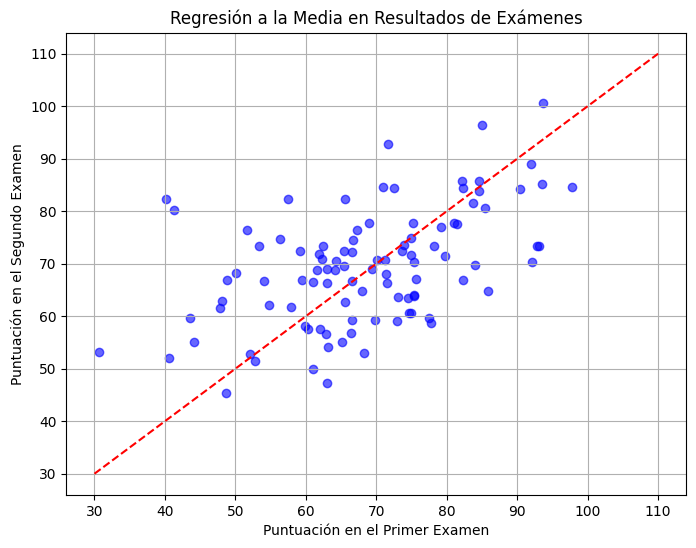

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Simulaci√≥n de resultados de ex√°menes
np.random.seed(42)
exam1_scores = np.random.normal(70, 15, 100)  # Puntuaciones del primer examen
exam2_scores = exam1_scores * 0.5 + np.random.normal(35, 10, 100)  # Puntuaciones del segundo examen con regresi√≥n a la media

# Crear el gr√°fico
plt.figure(figsize=(8, 6))
plt.scatter(exam1_scores, exam2_scores, color='blue', alpha=0.6)
plt.plot([30, 110], [30, 110], color='red', linestyle='--')  # L√≠nea de referencia (sin regresi√≥n)
plt.title('Regresi√≥n a la Media en Resultados de Ex√°menes')
plt.xlabel('Puntuaci√≥n en el Primer Examen')
plt.ylabel('Puntuaci√≥n en el Segundo Examen')
plt.grid(True)
plt.show()

> a. ¬øQu√© observas en el gr√°fico en t√©rminos de regresi√≥n a la media?

> b. ¬øPor qu√© crees que los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen tienden a acercarse m√°s al promedio en el segundo examen?

> c. ¬øC√≥mo podr√≠a este concepto aplicarse en otras √°reas, como en el an√°lisis de rendimiento en deportes o en la predicci√≥n de ventas?

A) En el gr√°fico proporcionado, la regresi√≥n a la media es evidente, especialmente al observar c√≥mo los puntos se alejan de la l√≠nea roja punteada (que indica igualdad de puntuaciones entre los dos ex√°menes) a medida que nos movemos hacia los extremos en el eje X (puntuaciones del primer examen). Los estudiantes con puntuaciones muy altas o muy bajas en el primer examen tienden a tener puntuaciones m√°s cercanas al promedio del grupo en el segundo examen. Esto se manifiesta en que los puntos tienden a agruparse m√°s cerca de la l√≠nea horizontal que representa el promedio general de los dos ex√°menes, en lugar de alinearse con la l√≠nea roja punteada.

b. Explicaci√≥n de la Tendencia hacia el Promedio
La tendencia de los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen a acercarse m√°s al promedio en el segundo examen se puede atribuir a varios factores:

Variabilidad Aleatoria: Las puntuaciones extremas pueden ser influenciadas por factores aleatorios como el estado de √°nimo del estudiante, la familiaridad con los temas espec√≠ficos del examen, o incluso errores en la evaluaci√≥n. Estos factores pueden no repetirse de la misma manera, llevando las puntuaciones hacia un resultado m√°s 'normal' o promedio en sucesivas evaluaciones.

Errores de Medici√≥n: En cualquier tipo de prueba o medici√≥n, siempre hay un grado de error de medici√≥n. Los estudiantes que extremadamente bien o mal podr√≠an haber tenido suerte o mala suerte respectivamente, y es probable que estos extremos no se repitan debido a la naturaleza aleatoria de dichos errores.

Adaptaci√≥n y Aprendizaje: Los estudiantes en los extremos pueden cambiar su comportamiento de estudio entre los ex√°menes. Los que lo hicieron excepcionalmente bien pueden sentirse complacientes, mientras que los que lo hicieron mal pueden esforzarse m√°s, resultando en una puntuaci√≥n que regresa hacia el promedio del grupo.

c. Aplicaci√≥n de la Regresi√≥n a la Media en Otros √Åmbitos
Deportes:

En el deporte, especialmente en ligas profesionales, frecuentemente se ve la regresi√≥n a la media con "novatos del a√±o" que tienen temporadas destacadas seguidas por temporadas menos espectaculares. Esto se puede analizar y prever para tomar decisiones sobre contratos, entrenamientos, y estrategias de juego. Por ejemplo, un equipo podr√≠a evitar sobrevalorar a un jugador bas√°ndose en una sola temporada excepcional.
Negocios y Ventas:

En el √°mbito empresarial, particularmente en ventas, la regresi√≥n a la media puede ayudar a moderar las expectativas despu√©s de un periodo particularmente bueno o malo. Si un producto tiene un pico de ventas debido a una campa√±a publicitaria, es probable que las ventas "regresen" a un nivel m√°s normal despu√©s de que el efecto de la campa√±a se disipe.
Adem√°s, se puede usar para ajustar las estrategias de producci√≥n y marketing, entendiendo que los extremos en las ventas pueden no ser sostenibles a largo plazo.
Finanzas:

En las inversiones, el rendimiento extremo de una acci√≥n o fondo en un a√±o dado a menudo regresa al promedio en a√±os siguientes. Esto es crucial para la gesti√≥n de portafolios, evitando decisiones basadas en rendimientos anormalmente altos o bajos que pueden no ser repetibles.


### Ideas Clave
- Especificar una hip√≥tesis y luego recopilar datos siguiendo los principios de aleatorizaci√≥n y muestreo aleatorio asegura contra el sesgo.
- La regresi√≥n a la media, que significa "volver atr√°s", es distinta del m√©todo de modelado estad√≠stico de regresi√≥n lineal, en el cual se estima una relaci√≥n lineal entre variables predictoras y una variable de resultado.


## <font color=green size=10>2.3 Distribuci√≥n Muestral de una Estad√≠stica</font>
***

El t√©rmino "distribuci√≥n muestral de una estad√≠stica" se refiere a la distribuci√≥n de una estad√≠stica muestral sobre muchas muestras tomadas de la misma poblaci√≥n. Gran parte de la estad√≠stica cl√°sica se ocupa de hacer inferencias de (peque√±as) muestras a (muy grandes) poblaciones.

### T√©rminos Clave para la Distribuci√≥n Muestral

**Estad√≠stica muestral**  
Una m√©trica calculada para una muestra de datos extra√≠da de una poblaci√≥n m√°s grande.

**Distribuci√≥n de datos**  
La distribuci√≥n de frecuencias de valores individuales en un conjunto de datos.

**Distribuci√≥n muestral**  
La distribuci√≥n de frecuencias de una estad√≠stica muestral sobre muchas muestras o resamples.

**Teorema del l√≠mite central**  
La tendencia de la distribuci√≥n muestral a adoptar una forma normal a medida que aumenta el tama√±o de la muestra.

**Error est√°ndar**  
La variabilidad (desviaci√≥n est√°ndar) de una estad√≠stica muestral en muchas muestras (no debe confundirse con la desviaci√≥n est√°ndar, que por s√≠ sola se refiere a la variabilidad de valores individuales de datos).

### Explicaciones Adicionales

T√≠picamente, se toma una muestra con el objetivo de medir algo (con una estad√≠stica muestral) o modelar algo (con un modelo estad√≠stico o de aprendizaje autom√°tico). Dado que nuestra estimaci√≥n o modelo se basa en una muestra, podr√≠a tener errores; podr√≠a ser diferente si tom√°ramos una muestra diferente. Por lo tanto, nos interesa saber qu√© tan diferente podr√≠a ser: una preocupaci√≥n clave es la variabilidad muestral. Si tuvi√©ramos muchos datos, podr√≠amos tomar muestras adicionales y observar directamente la distribuci√≥n de una estad√≠stica muestral.

Es importante distinguir entre la distribuci√≥n de los puntos de datos individuales, conocida como la distribuci√≥n de datos, y la distribuci√≥n de una estad√≠stica muestral, conocida como la distribuci√≥n muestral.

Esto se ilustra en un ejemplo usando el ingreso anual de los solicitantes de pr√©stamos de LendingClub.  
La tabla 2.1 muestra algunos registros de datos de pr√©stamos personales de LendingClub. LendingClub es un l√≠der en pr√©stamos entre personas (peer-to-peer lending), donde grupos de inversionistas otorgan pr√©stamos personales a individuos.


**Table 2.1. Algunos registros y columnas de datos de pr√©stamos de LendingClub**

| **Outcome** | **Loan amount** | **Income** | **Purpose**            | **Years employed** | **Home ownership** | **State** |
|-------------|-----------------|------------|------------------------|--------------------|-------------------|-----------|
| Paid off    | 10000           | 79100      | debt_consolidation     | 11                 | MORTGAGE          | NV        |
| Paid off    | 9600            | 48000      | moving                 | 5                  | MORTGAGE          | TN        |
| Paid off    | 18800           | 120036     | debt_consolidation     | 11                 | MORTGAGE          | MD        |
| Default     | 15250           | 232000     | small_business         | 9                  | MORTGAGE          | CA        |
| Paid off    | 17050           | 35000      | debt_consolidation     | 4                  | RENT              | MD        |
| Paid off    | 5500            | 43000      | debt_consolidation     | 4                  | RENT              | KS        |



A continuaci√≥n se presenta una explicaci√≥n de lo que representa cada columna en la tabla de datos de LendingClub:

- **Outcome**: Indica el resultado del pr√©stamo. Puede tener dos valores principales:
  - **Paid off**: Significa que el pr√©stamo fue pagado en su totalidad por el prestatario.
  - **Default**: Significa que el prestatario incumpli√≥ y no pudo pagar el pr√©stamo seg√∫n lo acordado.

- **Loan amount**: Representa la cantidad de dinero (en d√≥lares) que fue prestada al individuo.

- **Income**: Indica el ingreso anual del prestatario en d√≥lares. Este dato se utiliza para evaluar la capacidad del prestatario para devolver el pr√©stamo.

- **Purpose**: Describe el prop√≥sito o raz√≥n por la cual el prestatario solicit√≥ el pr√©stamo. Ejemplos comunes incluyen:
  - **debt_consolidation**: El prestatario solicit√≥ el pr√©stamo para consolidar deudas existentes.
  - **moving**: El pr√©stamo fue solicitado para cubrir gastos de mudanza.
  - **small_business**: El prestatario solicit√≥ el pr√©stamo para financiar un peque√±o negocio.

- **Years employed**: Indica la cantidad de a√±os que el prestatario ha estado empleado. Este dato es relevante para evaluar la estabilidad laboral del prestatario.

- **Home ownership**: Describe el estado de propiedad de la vivienda del prestatario. Los valores comunes incluyen:
  - **MORTGAGE**: El prestatario tiene una hipoteca sobre su vivienda.
  - **RENT**: El prestatario vive en una vivienda alquilada.

- **State**: Indica el estado de los Estados Unidos en el que reside el prestatario, usando abreviaturas de dos letras (por ejemplo, **NV** para Nevada, **CA** para California).

Estas columnas proporcionan informaci√≥n clave que se puede utilizar para evaluar la solvencia del prestatario y el riesgo asociado al pr√©stamo.


Una vez claro el significado de la tabla, vamos a tomar tres muestras de estos datos:  
- una muestra de 1,000 valores: simplemente se seleccionar√°n 1,000 registros individuales de la tabla de datos de pr√©stamos.
  
- una muestra de 1,000 medias de 5 valores: en lugar de tomar 1,000 registros individuales, se tomar√°n grupos de 5 registros y se calcular√° la media (promedio) de un valor espec√≠fico en cada grupo (por ejemplo, la media del ingreso). Este proceso se repetir√° hasta tener 1,000 medias, cada una calculada a partir de un grupo de 5 valores. Este enfoque nos permite observar c√≥mo se comporta la media de peque√±os grupos de datos en lugar de observar solo los valores individuales.
  
- una muestra de 1,000 medias de 20 valores: similar al anterior, pero en lugar de tomar grupos de 5 registros, se tomar√°n grupos de 20 registros. Nuevamente, se calcular√° la media para cada grupo y se repetir√°n los c√°lculos hasta obtener 1,000 medias, cada una basada en 20 valores. Este tipo de muestra nos da una idea de c√≥mo la media de un tama√±o de muestra m√°s grande se comporta en comparaci√≥n con la media de muestras m√°s peque√±as (en este caso, de 5 valores).
  
Luego, se hace el histograma de cada muestra para producir la gr√°fica correspondiente.

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv('Datos/loans_income.csv').squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
display(results.head())

income  type
1346   45198.0  Data
37210  83000.0  Data
7819   70000.0  Data
32220  66000.0  Data
10349  90000.0  Data

In [11]:
display(results.tail())

income        type
995  69335.05  Mean of 20
996  67024.35  Mean of 20
997  67300.00  Mean of 20
998  63507.45  Mean of 20
999  65356.65  Mean of 20

> **Ejercicio 2.4**: *Explique el c√≥digo de arriba. Con otro dataset de su preferencia repita el ejercicio de arriba.*   

In [21]:
# Guardar 'results' en un archivo CSV llamado 'results.csv'
# results.to_csv('results.csv', index=False)

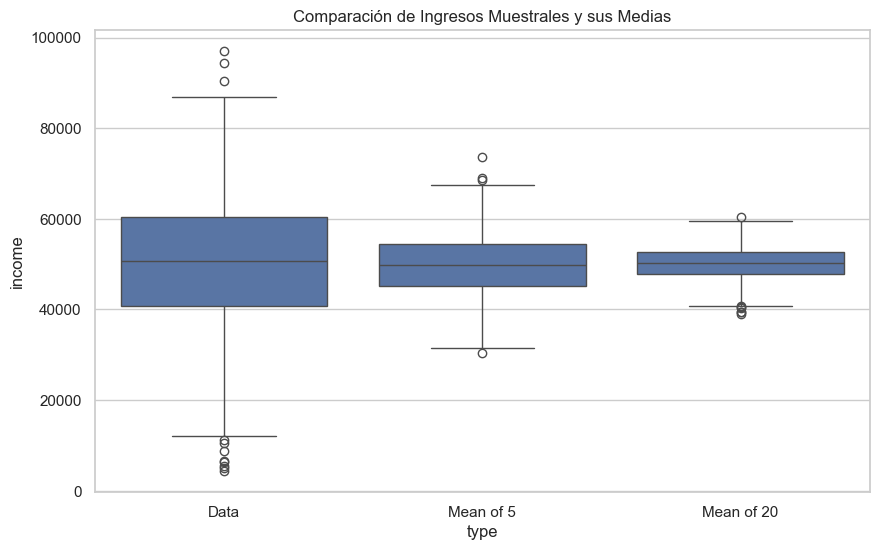

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

# Simulando un nuevo dataset de ingresos
np.random.seed(42)  # Para reproducibilidad
new_loans_income = pd.Series(np.random.normal(50000, 15000, 50000))

# Creando muestras para el nuevo dataset
new_sample_data = pd.DataFrame({
    'income': new_loans_income.sample(1000),
    'type': 'Data',
})

new_sample_mean_05 = pd.DataFrame({
    'income': [new_loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

new_sample_mean_20 = pd.DataFrame({
    'income': [new_loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

# Concatenar y visualizar resultados
new_results = pd.concat([new_sample_data, new_sample_mean_05, new_sample_mean_20])

# Visualizando los resultados con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='income', data=new_results)
plt.title('Comparaci√≥n de Ingresos Muestrales y sus Medias')
plt.show()


Ahora vamos a obtener los histogramas:

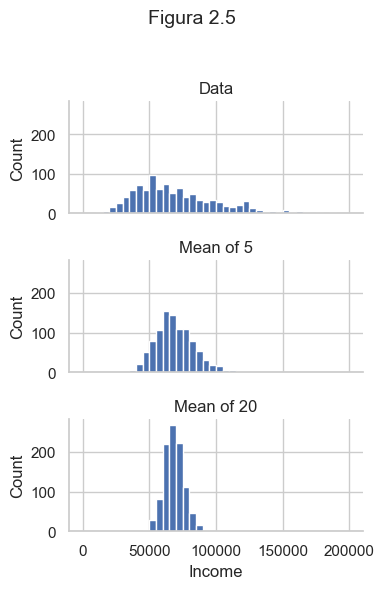

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')


g.fig.suptitle('Figura 2.5', fontsize=14)


plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()

> **Ejercicio 2.5**: *Explique el codigo dado arriba. Con el mismo dataset usado en el ejercicio 2.4 haga los plots*

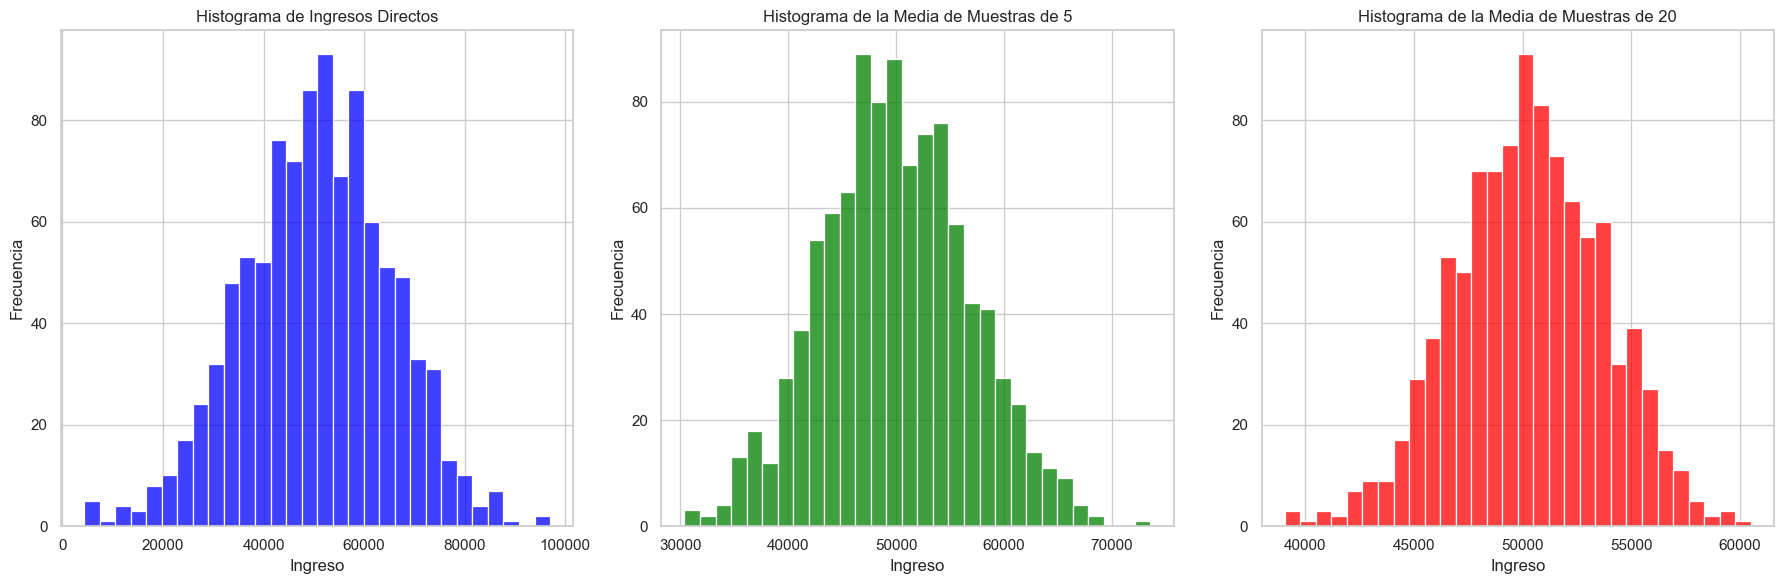

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes de estilo para los gr√°ficos
sns.set(style="whitegrid")

# Creaci√≥n de figuras para los histogramas
plt.figure(figsize=(18, 6))

# Histograma para los datos directos
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer gr√°fico
sns.histplot(new_sample_data['income'], bins=30, kde=False, color='blue')
plt.title('Histograma de Ingresos Directos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Histograma para la media de muestras de tama√±o 5
plt.subplot(1, 3, 2)
sns.histplot(new_sample_mean_05['income'], bins=30, kde=False, color='green')
plt.title('Histograma de la Media de Muestras de 5')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Histograma para la media de muestras de tama√±o 20
plt.subplot(1, 3, 3)
sns.histplot(new_sample_mean_20['income'], bins=30, kde=False, color='red')
plt.title('Histograma de la Media de Muestras de 20')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


El histograma de los valores de datos individuales est√° ampliamente distribuido y sesgado hacia valores m√°s altos, como es de esperar con los datos de ingresos. Los histogramas de las medias de 5 y 20 valores son cada vez m√°s compactos y tienen una forma m√°s similar a una campana.


## <font color=green size=10>2.4 Teorema del l√≠mite central </font>
***

Imagina que est√°s tomando fotos con una c√°mara antigua que no siempre es precisa. A veces tus fotos salen demasiado oscuras o demasiado claras, pero si tomas muchas fotos del mismo lugar, la mayor√≠a terminar√° vi√©ndose "normal". Eso es un poco lo que dice el Teorema del L√≠mite Central sobre los datos: no importa qu√© tan extra√±a sea la "foto" (distribuci√≥n) de tu conjunto de datos original, si tomas suficientes muestras y calculas su media, el resultado parecer√° m√°s y m√°s a lo que esperar√≠amos de una distribuci√≥n normal (la cl√°sica curva en forma de campana).

#### <font color=violet size=10>Error Est√°ndar</font>
***

Piensa en el error est√°ndar como una manera de medir qu√© tan confiables son tus medias de muestras. Es como intentar calcular cu√°n cerca est√° el dardo del centro del blanco cada vez que lanzas. Mientras m√°s dardos lanzas, m√°s precisos puedes ser sobre cu√°n buen tirador eres. En estad√≠stica, mientras m√°s grande es tu muestra, m√°s peque√±o es el error est√°ndar, y m√°s confianza puedes tener en que tu media de muestra est√° cerca de la media real de toda la poblaci√≥n.

# $\text{Error est√°ndar} = SE = \frac{s}{\sqrt{n}}$

A medida que aumenta el tama√±o de la muestra, el error est√°ndar disminuye, lo que corresponde a lo observado en la Figura 2.5. 

Considera el siguiente enfoque para medir el error est√°ndar:

1. Recoge una serie de nuevas muestras de la poblaci√≥n.
2. Para cada nueva muestra, calcula la estad√≠stica (por ejemplo, la media).
3. Calcula la desviaci√≥n est√°ndar de las estad√≠sticas calculadas en el paso 2; utiliza esto como tu estimaci√≥n del error est√°ndar.

En la pr√°ctica, este enfoque de recolectar nuevas muestras para estimar el error est√°ndar no suele ser muy eficiente. En su lugar, puedes utilizar remuestreo **bootstrap**. En la estad√≠stica moderna, el bootstrap se ha convertido en la forma mas usada de estimar el error est√°ndar. Puede utilizarse para pr√°cticamente cualquier estad√≠stica y no depende del teorema del l√≠mite central u otros supuestos de distribuci√≥n.


#### <font color=violet size=10>Desviaci√≥n Est√°ndar versus Error Est√°ndar</font>
***

No confundir la desviaci√≥n est√°ndar (que mide la variabilidad de puntos de datos individuales) con el error est√°ndar (que mide la variabilidad de una m√©trica de la muestra).

### Ideas Clave

- La distribuci√≥n de frecuencias de una estad√≠stica muestral nos dice c√≥mo esa m√©trica podr√≠a variar de una muestra a otra.
- Esta distribuci√≥n muestral puede estimarse a trav√©s del bootstrap o mediante f√≥rmulas que dependen del teorema del l√≠mite central.
- Una m√©trica clave que resume la variabilidad de una estad√≠stica muestral es su error est√°ndar.

## <font color=green size=10>2.6 Bootstrap</font>
***

El bootstrap es como hacer trampa en una prueba de pr√°ctica al usar las preguntas que ya sabes que estar√°n en el examen. En lugar de salir y recolectar nuevas muestras, que puede ser caro y consumir mucho tiempo, simplemente reutilizas los datos que ya tienes de maneras inteligentes para estimar cu√°nto podr√≠an variar tus resultados. Esto te ayuda a entender qu√© tan estables son tus estad√≠sticas, como la media, incluso sin asumir que tus datos se ajustan perfectamente a una distribuci√≥n normal.

### T√©rminos Clave para el Bootstrap

>**Bootstrap Sample**  
Una muestra tomada con reemplazo de un conjunto de datos observado.

>**Remuestreo (Resampling)**  
El proceso de tomar muestras repetidas de datos observados; incluye tanto procedimientos de bootstrap como de permutaci√≥n (shuffling).

Conceptualmente, se puede imaginar el bootstrap como replicar la muestra original miles o millones de veces para que tengas una poblaci√≥n hipot√©tica que encarna todo el conocimiento de tu muestra original (simplemente es m√°s grande). Luego puedes tomar muestras de esta poblaci√≥n hipot√©tica con el prop√≥sito de estimar una distribuci√≥n muestral; ver la Figura 2.6.



![Fig 2.6](dATOS/2.6.png)

### ¬øC√≥mo funciona el Bootstrap?

El proceso de bootstrap se puede resumir en los siguientes pasos:

1. **Toma de muestras con reemplazo:**

  Imagina que tienes una bolsa llena de canicas de diferentes colores, cada canica representa un dato de tu conjunto original. Cuando realizas una toma de muestras con reemplazo, sacas una canica, registras su color (el dato) y luego la devuelves a la bolsa. Esto significa que esa misma canica podr√≠a ser seleccionada de nuevo en la misma muestra. Este paso es crucial porque te asegura que cada muestra que generes pueda tener la misma diversidad (o incluso duplicados) que tienes en el conjunto de datos original. As√≠, cada muestra puede ser considerada como una posible representaci√≥n del conjunto total.

2. **C√°lculo de la estad√≠stica:**

   Una vez que tienes tu muestra (digamos, un pu√±ado de canicas sacadas de la bolsa), calculas lo que te interesa saber. Por ejemplo, si quieres conocer el color promedio, calcular√≠as cu√°l es el color m√°s frecuente en esa muestra espec√≠fica. En t√©rminos estad√≠sticos, podr√≠as estar calculando la media, la mediana, la moda, etc., dependiendo de lo que necesitas saber sobre los datos.

3. **Repetici√≥n del proceso:**

  Este paso es como repetir el juego de las canicas muchas veces. Cada vez que lo haces, devuelves todas las canicas, mezclas bien, y vuelves a sacar una muestra. Esto se hace muchas veces (por ejemplo, 1,000 o 10,000 veces) para obtener una buena variedad de resultados posibles. Esto te da una "simulaci√≥n" de lo que podr√≠as esperar si pudieras hacer infinitas pruebas con tus datos

4. **An√°lisis de los resultados:**

Despu√©s de repetir el proceso muchas veces, tendr√°s un mont√≥n de resultados para la estad√≠stica que te interesaba (por ejemplo, muchos colores promedio diferentes). Puedes analizar estos resultados para obtener una mejor idea de qu√© esperar de tus datos. Esto puede incluir:

Calcular el promedio de estas estad√≠sticas: Para tener una idea del valor central.

Estimar el error est√°ndar: Mira qu√© tan dispersos est√°n tus resultados alrededor del promedio.

Construir intervalos de confianza: Para ver el rango donde es probable que se encuentre la verdadera estad√≠stica de toda la poblaci√≥n.

Visualizaci√≥n: Un histograma o un diagrama de caja puede mostrarte la forma de la distribuci√≥n de tus estad√≠sticas, ayud√°ndote a entender la variabilidad y la confiabilidad de las estimaciones.

Los principales paquetes de Python no proporcionan implementaciones del enfoque bootstrap. Sin embargo, se puede implementar utilizando el m√©todo `resample` de scikit-learn:

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -74.99349999999686
std. error: 213.8871101858493


1. **Original: 62000.0**
   - Este valor es la mediana original de los ingresos (`loans_income`) antes de aplicar el bootstrap. La mediana es el valor que separa la mitad superior de los ingresos de la mitad inferior. En este caso, la mediana de los ingresos en la muestra original es de **62,000**.

2. **Bias: -79.29099999999744**
   - El sesgo (**bias**) se calcula como la diferencia entre la media de las medianas obtenidas en las iteraciones del bootstrap y la mediana original de los datos. En este caso, el sesgo es de aproximadamente **-79.29099999999744**, lo que indica que, en promedio, las medianas calculadas a partir de las muestras bootstrap son ligeramente menores que la mediana original. Un sesgo negativo sugiere que las muestras tienden a subestimar la mediana original.

En el contexto del bootstrap, el **sesgo** (bias) se refiere a la diferencia sistem√°tica entre la estimaci√≥n obtenida a partir de los datos muestrales (en este caso, las medianas obtenidas a trav√©s del bootstrap) y el valor observado en los datos originales (la mediana original de los ingresos).

En la salida proporcionada, el sesgo obtenido significa que, en promedio, las medianas calculadas a partir de las 1,000 muestras bootstrap son **76.830 unidades menores** que la mediana original de la muestra de ingresos (`loans_income`).

 **Direcci√≥n del Sesgo**:
   - El signo negativo (-) indica la direcci√≥n del sesgo. En este caso, sugiere que las muestras bootstrap tienden a subestimar la mediana verdadera de la poblaci√≥n. Si el sesgo fuera positivo, implicar√≠a una sobreestimaci√≥n sistem√°tica.

 **Magnitud del Sesgo**:
   - La magnitud del sesgo (79.30) nos da una idea de cu√°nto difieren, en promedio, las medianas bootstrap de la mediana original. Aunque un sesgo de -76.830 podr√≠a parecer peque√±o en relaci√≥n con la mediana original de 62,000, es importante en contextos donde la precisi√≥n es cr√≠tica.

El sesgo puede surgir por varias razones, incluyendo:

- **Naturaleza de la Muestra Original**: Si la muestra original no es completamente representativa de la poblaci√≥n subyacente, el bootstrap podr√≠a reflejar y amplificar ese sesgo.
- **Distribuci√≥n Asim√©trica de los Datos**: Si los datos est√°n sesgados (por ejemplo, con una cola larga a la derecha), la mediana en las muestras bootstrap podr√≠a estar sistem√°ticamente desviada hacia un lado en relaci√≥n con la mediana original.


3. **Std. error: 227.78612191337808**
   - El error est√°ndar (**std. error**) mide la variabilidad de las medianas obtenidas a partir del bootstrap. Es una estimaci√≥n de la desviaci√≥n est√°ndar de la distribuci√≥n muestral de la mediana. En este caso, el error est√°ndar es de aproximadamente **227.78612191337808**, lo que proporciona una idea de cu√°nto podr√≠an variar las medianas si se tomaran diferentes muestras de la misma poblaci√≥n.

> **Ejercicio 2.6:** Explicar el c√≥digo de bootstrap dado arriba. Con otra dataset de tu preferencia repite el c√≥digo de arriba e interpreta resultados. 

## An√°lisis de Resultados Bootstrap

Los resultados obtenidos a partir del an√°lisis bootstrap muestran una interesante distribuci√≥n y variabilidad de las medianas calculadas a partir de 1,000 muestras re-muestreadas de los ingresos. Los siguientes puntos resumen los hallazgos clave:

1. **Mediana Original de Ingresos: $62,000**
   - Este valor es la mediana de los ingresos en la muestra de datos original antes de aplicar cualquier m√©todo de bootstrap.

2. **Sesgo (Bias): -74.99**
   - Indica una subestimaci√≥n promedio de la mediana original por parte de las muestras bootstrap. Un sesgo negativo como este sugiere que las medianas obtenidas tienden a ser menores que la mediana real de la poblaci√≥n, lo que podr√≠a ser indicativo de una muestra original con caracter√≠sticas particulares o de la naturaleza del muestreo con reemplazo.

3. **Error Est√°ndar: 213.89**
   - Representa la desviaci√≥n est√°ndar de las medianas obtenidas, proporcionando una medida de cu√°n dispersas est√°n las medianas bootstrap en relaci√≥n con la mediana original. Este valor es √∫til para entender la variabilidad y la confiabilidad de las estimaciones obtenidas mediante bootstrap.


## <font color=green size=10>2.7 Intervalos de confianza.</font>
***

Las tablas de frecuencias, histogramas, diagramas de caja (boxplots) y errores est√°ndar son formas de entender el posible error en una estimaci√≥n muestral. Los intervalos de confianza tambien ayudan a encontrar dichos errores.

Existe una aversi√≥n natural a la incertidumbre; las personas (especialmente los expertos) dicen "No s√©" con demasiada poca frecuencia. Los analistas y gerentes, aunque reconocen la incertidumbre, tienden a depositar una fe excesiva en una estimaci√≥n cuando se presenta como un solo n√∫mero (una estimaci√≥n puntual). Presentar una estimaci√≥n no como un solo n√∫mero, sino como un rango. Los intervalos de confianza hacen esto de una manera fundamentada en los principios del muestreo estad√≠stico.

Un intervalo de confianza es un rango de valores, derivado de datos muestrales, que se utiliza para estimar un par√°metro desconocido de una poblaci√≥n. Este rango viene acompa√±ado de un nivel de confianza que indica la probabilidad de que el intervalo contenga el verdadero valor del par√°metro poblacional.

En t√©rminos pr√°cticos, si se construye un intervalo de confianza del 95% a partir de una muestra, esto significa que si se tomaran muchas muestras similares y se construyeran intervalos de confianza para cada una, aproximadamente el 95% de esos intervalos contendr√≠an el verdadero valor del par√°metro poblacional.

Por ejemplo, si calculas un intervalo de confianza del 95% para la media de una poblaci√≥n, el intervalo te proporcionar√° un rango de valores dentro del cual es razonable esperar que caiga la verdadera media poblacional, con un 95% de certeza.

In [2]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Media = 50, Desviaci√≥n est√°ndar = 10, Tama√±o de la muestra = 100

mean = np.mean(data)

sem = stats.sem(data)  # sem = standard error of the mean

confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)

ci_lower = float(confidence_interval[0])
ci_upper = float(confidence_interval[1])

print(f"Media de la muestra: {mean:.2f}")
print(f"Intervalo de confianza del 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Media de la muestra: 48.96
Intervalo de confianza del 95%: (47.16, 50.76)


**Media de la muestra**:
La media de los datos generados es 48.96. Esto es la estimaci√≥n puntual de la media de la poblaci√≥n.  

**Intervalo de Confianza del 95%:**
El intervalo de confianza del 95% para la media est√° entre 47.16 y 50.76.
Esto significa que, si tomamos muchas muestras de la misma poblaci√≥n y calculamos un intervalo de confianza del 95% para cada una, aproximadamente el 95% de esos intervalos contendr√°n la verdadera media poblacional.
En este caso, podemos estar un 95% seguros de que la verdadera media de la poblaci√≥n de la cual proviene la muestra se encuentra entre 47.16 y 50.76.

> **Ejercicio 2.7**: Explicar cada linea del codigo. Repite el ejercicio con otra muestra de datos y usando un intervalo de confianza del 98%

In [17]:
# Nueva semilla y datos
np.random.seed(99)
new_data = np.random.normal(loc=60, scale=15, size=100)  # Media = 60, Desviaci√≥n est√°ndar = 15

new_mean = np.mean(new_data)
new_sem = stats.sem(new_data)

# Intervalo de confianza del 98%
new_confidence_interval = stats.t.interval(0.98, len(new_data)-1, loc=new_mean, scale=new_sem)
new_ci_lower = float(new_confidence_interval[0])
new_ci_upper = float(new_confidence_interval[1])

print(f"Media de la nueva muestra: {new_mean:.2f}")
print(f"Intervalo de confianza del 98%: ({new_ci_lower:.2f}, {new_ci_upper:.2f})")


Media de la nueva muestra: 60.90
Intervalo de confianza del 98%: (57.37, 64.43)


> **Ejercicio 2.8**. Repetir el ejemplo anterior pero esta vez utilice statsmodels en vez de scipy. Compare resultados.

In [18]:
import numpy as np
import statsmodels.api as sm

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
data = np.random.normal(loc=50, scale=10, size=100)

# Usar statsmodels para calcular el intervalo de confianza
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Calculando el SEM manualmente

# Calcular el intervalo de confianza del 95%
ci_low, ci_upp = sm.stats.DescrStatsW(data).tconfint_mean()

print(f"Media de la muestra usando statsmodels: {mean:.2f}")
print(f"Intervalo de confianza del 95% usando statsmodels: ({ci_low:.2f}, {ci_upp:.2f})")


Media de la muestra usando statsmodels: 48.96
Intervalo de confianza del 95% usando statsmodels: (47.16, 50.76)


Dado un tama√±o de muestra \( n \), y una estad√≠stica muestral de inter√©s, el algoritmo para un intervalo de confianza bootstrap es el siguiente:

1. Tomar una muestra aleatoria de tama√±o \( n \) con reemplazo de los datos (un remuestreo).
2. Registrar la estad√≠stica de inter√©s para el remuestreo.
   
   **Estad√≠stica de inter√©s**: Puede ser cualquier medida que est√©s estudiando, como la media, la mediana, la desviaci√≥n est√°ndar, etc. Despu√©s de tomar la muestra con reemplazo en el paso 1, calculas esta estad√≠stica para la muestra seleccionada.
4. Repetir los pasos 1-2 muchas veces (\( R \) veces). Cuantas m√°s iteraciones hagas, m√°s precisa ser√° la estimaci√≥n del intervalo de confianza.
5. Para un intervalo de confianza de x%, recortar $\left[\frac{100-x}{2}\right]\%$ de los resultados de los \( R \) remuestreos desde cada extremo de la distribuci√≥n.
   
   **Recorte:** Despu√©s de tener todas las estad√≠sticas calculadas en los \( R \) remuestreos, ordenas estas estad√≠sticas de menor a mayor. Luego, para un intervalo de confianza de  $x\%$, recortas los valores extremos, es decir, eliminas el $\left[\frac{100-x}{2}\right]\%$ de los valores m√°s bajos y el mismo porcentaje de los valores m√°s altos. Por ejemplo, para un intervalo de confianza del 95%, recortar√≠as el 2.5% inferior y el 2.5% superior de las estad√≠sticas obtenidas de los ùëÖ remuestreos.

7. Los puntos de recorte son los extremos de un intervalo de confianza bootstrap de  $x\%$ .
   
   Puntos de recorte: Despu√©s de recortar los extremos, los valores m√°s bajo y m√°s alto que quedan forman los extremos del intervalo de confianza. Es decir, el intervalo de confianza estar√° entre estos dos puntos, y con un ùë•% de confianza, podemos decir que este intervalo contiene la verdadera estad√≠stica poblacional.

La Figura 2.9 muestra un intervalo de confianza del 90% para el ingreso anual promedio de los solicitantes de pr√©stamos, basado en una muestra de 20 en la que la media fue de $55.836.


![Fig 2.7](Datos/2.7.png)

68760.51844
55734.1


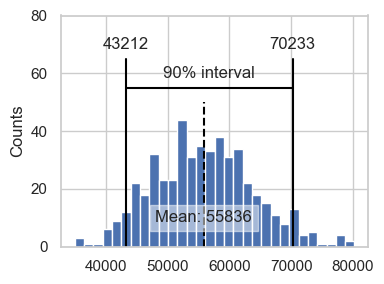

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

El bootstrap es una herramienta general que se puede utilizar para generar intervalos de confianza para la mayor√≠a de las estad√≠sticas o par√°metros de modelos. Los libros de texto de estad√≠stica y el software, con ra√≠ces en m√°s de medio siglo de an√°lisis estad√≠stico sin computadoras, tambi√©n hacen referencia a intervalos de confianza generados por f√≥rmulas, especialmente la distribuci√≥n t.

Por supuesto, lo que realmente nos interesa cuando tenemos un resultado muestral es: "¬øCu√°l es la probabilidad de que el valor verdadero est√© dentro de un cierto intervalo?" Esta no es realmente la pregunta que responde un intervalo de confianza, pero termina siendo la forma en que la mayor√≠a de las personas interpretan la respuesta.

El porcentaje asociado con el intervalo de confianza se denomina nivel de confianza. Cuanto mayor sea el nivel de confianza, m√°s amplio ser√° el intervalo. Esto sucede porque, al querer estar m√°s seguro de que el intervalo contiene el valor verdadero, se necesita un rango m√°s amplio para cubrir todas las posibles variaciones en los datos muestrales. Por ejemplo, un intervalo de confianza del 99% ser√° m√°s amplio que un intervalo de confianza del 95%, porque queremos estar m√°s seguros (99% en lugar de 95%) de que el intervalo contiene el valor verdadero, y para lograr esa mayor seguridad, ampliamos el intervalo.

Adem√°s, cuanto m√°s peque√±a sea la muestra, m√°s amplio ser√° el intervalo (es decir, mayor ser√° la incertidumbre). Esto sucede porque con menos datos, hay m√°s incertidumbre acerca de la estimaci√≥n del par√°metro verdadero. Para compensar esa incertidumbre, se necesita un intervalo m√°s amplio.  

Ambos aspectos tienen sentido: cuanto m√°s seguro quieres estar, y cuanto menos datos tienes, m√°s amplio debe ser el intervalo de confianza para estar suficientemente seguro de capturar el valor verdadero. Un tama√±o de muestra peque√±o significa que tienes menos informaci√≥n sobre la poblaci√≥n, lo que introduce m√°s variabilidad e incertidumbre en tus estimaciones. Para tener la misma seguridad (por ejemplo, un 95% de confianza), el intervalo debe ser m√°s amplio para asegurarse de que incluye el valor verdadero, dado que hay m√°s margen de error. Por el contrario, con un tama√±o de muestra m√°s grande, tienes m√°s informaci√≥n, lo que reduce la incertidumbre y permite calcular un intervalo de confianza m√°s estrecho.

**Ejemplo para Ilustrar el Concepto**  

Imagina que est√°s midiendo la altura promedio de estudiantes en una escuela. Si quieres estar 95% seguro de que el intervalo de confianza contiene la altura promedio verdadera, el intervalo podr√≠a ser algo as√≠ como de 160 cm a 170 cm. Si decides que necesitas estar 99% seguro, podr√≠as necesitar ampliar el intervalo a algo como de 155 cm a 175 cm para capturar todas las posibles variaciones. Si tomas la altura de solo 5 estudiantes (una muestra peque√±a), podr√≠as obtener un intervalo de confianza de 150 cm a 180 cm debido a la mayor incertidumbre. Pero si tomas la altura de 50 estudiantes (una muestra m√°s grande), podr√≠as obtener un intervalo m√°s preciso, digamos de 160 cm a 170 cm.

### Ideas Clave
- Los intervalos de confianza son la forma t√≠pica de presentar estimaciones como un rango de intervalos.
- Cuantos m√°s datos tengas, menos variable ser√° una estimaci√≥n muestral.
- Cuanto menor sea el nivel de confianza que puedas tolerar, m√°s estrecho ser√° el intervalo de confianza.
- El bootstrap es una forma efectiva de construir intervalos de confianza.

> **Ejercicio 2.9**. Investigar las aplicaiones y casos de uso de Bootstraping en Machine Learning. Mostrar los resultados en un resumen.

El m√©todo de bootstrap es una t√©cnica poderosa y vers√°til que encuentra m√∫ltiples aplicaciones en el √°mbito del machine learning. Las principales aplicaciones y casos de uso de bootstrapping en este campo:

1. Evaluaci√≥n de Modelos

El bootstrap permite estimar la variabilidad y la confiabilidad de las m√©tricas de rendimiento de un modelo de aprendizaje autom√°tico. Por ejemplo, al entrenar un modelo de clasificaci√≥n, puedes utilizar el bootstrap para generar m√∫ltiples conjuntos de datos de entrenamiento y prueba a partir de un √∫nico conjunto de datos original. Esto te permite:

Estimar la varianza en las m√©tricas de rendimiento como precisi√≥n, recall, y F1-score.
Obtener intervalos de confianza para estas m√©tricas, lo que proporciona una visi√≥n m√°s profunda sobre la estabilidad y confiabilidad del modelo.

2. Comparaci√≥n de Modelos

Cuando se comparan dos o m√°s modelos, el bootstrap puede ser usado para evaluar si las diferencias en el rendimiento entre los modelos son estad√≠sticamente significativas. Esto es √∫til para:

Determinar si un modelo es genuinamente superior a otro o si las diferencias observadas podr√≠an deberse a la variabilidad de los datos.
Proporcionar pruebas estad√≠sticas robustas que apoyen la selecci√≥n de modelos.

3. Selecci√≥n de Caracter√≠sticas

El bootstrap tambi√©n se utiliza en la selecci√≥n de caracter√≠sticas para evaluar la importancia y la estabilidad de las caracter√≠sticas seleccionadas. Al realizar bootstrapping en los datos y luego aplicar algoritmos de selecci√≥n de caracter√≠sticas en cada muestra, puedes:

Identificar cu√°les caracter√≠sticas son consistentemente seleccionadas, lo que indica su relevancia y robustez.
Reducir la probabilidad de sobreajustar a caracter√≠sticas que pueden ser ruidosas o irrelevantes.

4. Ensemble Learning

En t√©cnicas de ensemble como Bagging (Bootstrap Aggregating), el bootstrap es fundamental para mejorar el rendimiento y la estabilidad de los modelos predictivos. En este contexto, el bootstrap se usa para:

Crear m√∫ltiples modelos a partir de subconjuntos aleatorios del conjunto de datos original.
Combinar las predicciones de estos modelos para mejorar la precisi√≥n y reducir la varianza.

5. Estimaci√≥n de Incertidumbre

En aplicaciones como la regresi√≥n y la clasificaci√≥n, el bootstrap ayuda a estimar la incertidumbre en las predicciones del modelo. Esto es crucial para:

Proporcionar bandas de confianza o intervalos de predicci√≥n alrededor de las estimaciones, lo que es esencial en campos como la medicina y la finanzas donde las decisiones basadas en predicciones requieren una comprensi√≥n clara de los riesgos asociados.

6. Validaci√≥n de Datos Sint√©ticos

El bootstrap puede utilizarse para validar la calidad de los datos sint√©ticos generados por t√©cnicas como el aumento de datos o la imputaci√≥n. Al comparar estad√≠sticas calculadas a partir de datos originales y sint√©ticos, el bootstrap ofrece:

Una manera de medir cu√°n bien los datos sint√©ticos representan la distribuci√≥n de los datos reales.
Herramientas para ajustar y mejorar los m√©todos de generaci√≥n de datos sint√©ticos.

> **Ejercicio 2.10** Replicar en un jupyter notebook los resultados del siguiente art√≠culo: https://cienciadedatos.net/documentos/pystats04-bootstrapping-python
> Nota: Con replicar los codigos ser√≠a suficiente para entregar; replicar la teoria es opcional aunque por lo menos debes leerla si realmente quieres entender la importancia del Bootstrapping 

In [20]:
# Librer√≠as 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import pandas as pd
from tqdm import tqdm


In [21]:
# Generaci√≥n de datos
np.random.seed(42)
datos = np.random.normal(loc=50, scale=10, size=30)

Funciones de Estad√≠sticos y Bootstrapping

Definimos una funci√≥n para calcular el estad√≠stico de inter√©s (media en este caso) y otra para realizar el bootstrapping

In [22]:
def calcular_estadistico(x):
    """Calcula la media de una muestra."""
    return np.mean(x)

def bootstraping(x, fun_estadistico, n_iteraciones=1000):
    """Genera muestras bootstrap y calcula el estad√≠stico para cada muestra."""
    n = len(x)
    dist_boot = np.empty(n_iteraciones)
    for i in range(n_iteraciones):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
    return dist_boot


In [23]:
# Intervalo de Confianza basado en percentiles 
dist_boot = bootstraping(datos, calcular_estadistico, 1000)
ci = np.percentile(dist_boot, [2.5, 97.5])


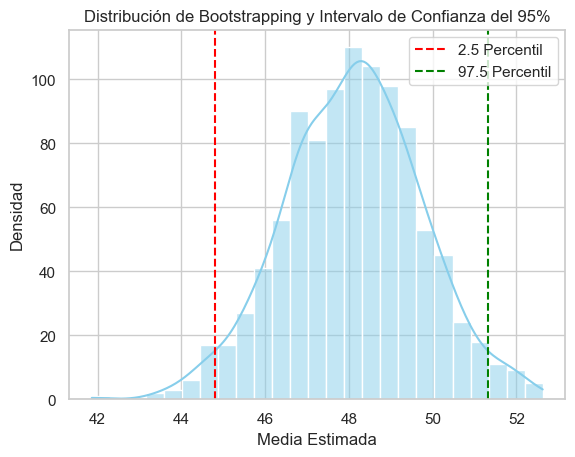

In [24]:
sns.histplot(dist_boot, kde=True, color="skyblue")
plt.axvline(x=ci[0], linestyle="--", label="2.5 Percentil", color='red')
plt.axvline(x=ci[1], linestyle="--", label="97.5 Percentil", color='green')
plt.title("Distribuci√≥n de Bootstrapping y Intervalo de Confianza del 95%")
plt.xlabel("Media Estimada")
plt.ylabel("Densidad")
plt.legend()
plt.show()


In [25]:
print(f"Media observada de la muestra: {np.mean(datos)}")
print(f"Intervalo de confianza del 95% basado en percentiles: {ci}")


Media observada de la muestra: 48.118531041489625
Intervalo de confianza del 95% basado en percentiles: [44.79884592 51.31773864]
